In [123]:
%load_ext autoreload
%autoreload 2

import os
import cv2
import matplotlib.pyplot as plt
from attention.img_proc.img_process import *
from attention.img_proc.img_split import *
from attention.models.face_models import *
from attention.utils.img_plot import *
import copy
from mediapipe.framework.formats.landmark_pb2 import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [124]:
image_name = "cedricstraight.jpg"
image_path = os.path.join(os.path.expanduser('~'), "Desktop", image_name)

In [125]:
face = cv2_process(image_path)

In [126]:
landmarks = find_landmarks(face)

In [127]:
face_annotated = output_face_landmarks(face, landmarks)

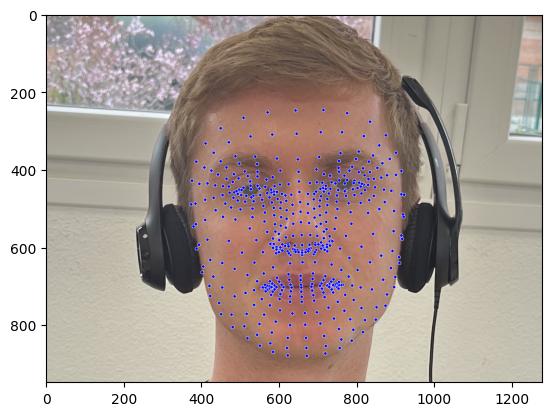

In [128]:
plt.imshow(face_annotated)

In [130]:
img_width = face.shape[1]
img_height = face.shape[0]
landmarks_dict = dict()
for idx, landmark in enumerate(landmarks.landmark):
    landmarks_dict[idx] = (int(landmark.x * img_width), int(landmark.y * img_height))

In [150]:
LEFT_EYE =[ 362, 263]
RIGHT_EYE=[ 33, 133]
LEFT_IRIS = [473 ,474, 475, 476, 477]
RIGHT_IRIS = [468, 469, 470, 471, 472]

In [151]:
landmarks_annot = LEFT_EYE + RIGHT_EYE + LEFT_IRIS + RIGHT_IRIS

In [152]:
face_copy = face.copy()
for lm in landmarks_annot:
    cv2.circle(face_copy, landmarks_dict[lm], radius=3, color=(0, 255, 0), thickness=-1)


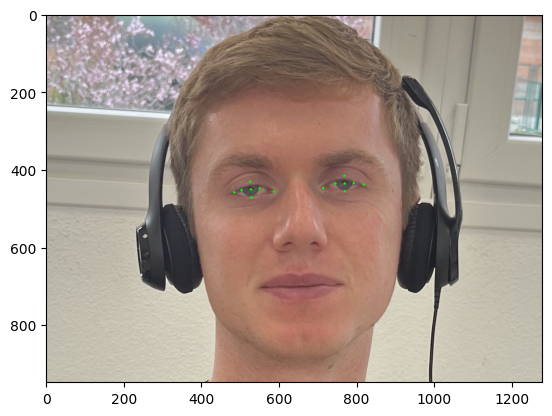

In [153]:
plt.imshow(face_copy)